In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
np.random.seed(32)

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.utils.np_utils import to_categorical

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/onlinereviews.csv")

In [ ]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


(array([ 3701.,     0.,  1833.,     0.,     0.,  4369.,     0., 14598.,
            0., 46543.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

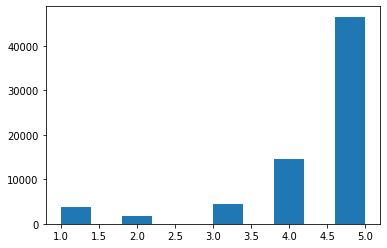

In [ ]:
plt.hist(df['reviews.rating'])

In [ ]:
df['target'] = df['reviews.rating']<4

In [ ]:
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['target'],test_size = 0.2)

In [ ]:
train_text.shape

(56835,)

In [ ]:
MAX_WORDS = 30000

In [ ]:
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

In [ ]:
tokenizer = Tokenizer(nb_words=MAX_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26057 unique tokens.


In [ ]:
sequences[7]

[39, 8, 1, 84, 170, 155, 14, 6820, 3310, 4, 412, 3738, 20, 84, 605, 84, 98]

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 26057)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[7]])

'one of the best movies made in 1994 surely a classic cult movie best deal best buy'

In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 39.5
max length: 1036


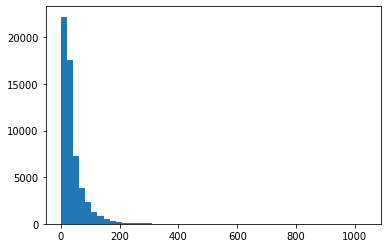

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

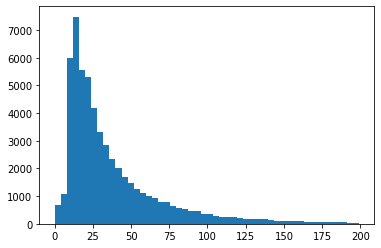

In [ ]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

In [ ]:
SEQUENCE_LENGTH = 250


x_train = pad_sequences(sequences, maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (56835, 250)
Shape of data test tensor: (14209, 250)


In [ ]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (56835, 2)


In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model



In [ ]:

DIMENSION = 150
NUM_CLASSES = 2


sequence_input = Input(shape=(SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_WORDS, DIMENSION,
                            input_length=SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(NUM_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=128)

          


Epoch 1/20
400/400 [==============================] - 27s 67ms/step - loss: 0.1182 - acc: 0.9580 - val_loss: 0.2700 - val_acc: 0.9171
Epoch 2/20
400/400 [==============================] - 28s 70ms/step - loss: 0.1152 - acc: 0.9594 - val_loss: 0.2759 - val_acc: 0.9163
Epoch 3/20
400/400 [==============================] - 27s 69ms/step - loss: 0.1136 - acc: 0.9595 - val_loss: 0.2856 - val_acc: 0.9168
Epoch 4/20
400/400 [==============================] - 28s 70ms/step - loss: 0.1113 - acc: 0.9613 - val_loss: 0.2915 - val_acc: 0.9164
Epoch 5/20
400/400 [==============================] - 27s 69ms/step - loss: 0.1083 - acc: 0.9627 - val_loss: 0.2880 - val_acc: 0.9148
Epoch 6/20
400/400 [==============================] - 27s 68ms/step - loss: 0.1068 - acc: 0.9628 - val_loss: 0.2935 - val_acc: 0.9145
Epoch 7/20
400/400 [==============================] - 27s 68ms/step - loss: 0.1049 - acc: 0.9637 - val_loss: 0.2976 - val_acc: 0.9145
Epoch 8/20
400/400 [==============================] - 27s 68ms

<function matplotlib.pyplot.show>

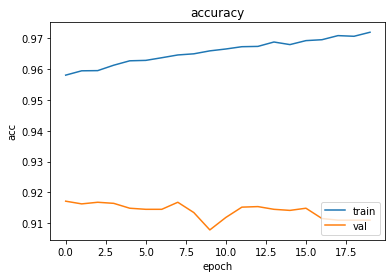

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

<function matplotlib.pyplot.show>

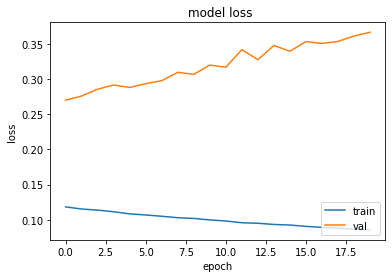

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

In [ ]:
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

test auc: 0.8805006227271571


In [ ]:
sequence_input = Input(shape=(SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(2, activation='softmax')(x)


model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history1=model.fit(x_train, y_train, validation_split=0.1,
          epochs=20, batch_size=128)

Epoch 1/20
400/400 [==============================] - 767s 2s/step - loss: 0.1009 - acc: 0.9647 - val_loss: 0.3752 - val_acc: 0.9015
Epoch 2/20
400/400 [==============================] - 737s 2s/step - loss: 0.0931 - acc: 0.9680 - val_loss: 0.3710 - val_acc: 0.9066
Epoch 3/20
400/400 [==============================] - 706s 2s/step - loss: 0.0924 - acc: 0.9686 - val_loss: 0.3335 - val_acc: 0.9048
Epoch 4/20
400/400 [==============================] - 728s 2s/step - loss: 0.0826 - acc: 0.9724 - val_loss: 0.3900 - val_acc: 0.9092
Epoch 5/20
400/400 [==============================] - 698s 2s/step - loss: 0.0761 - acc: 0.9742 - val_loss: 0.3536 - val_acc: 0.9059
Epoch 6/20
400/400 [==============================] - 691s 2s/step - loss: 0.0687 - acc: 0.9774 - val_loss: 0.3641 - val_acc: 0.9069
Epoch 7/20
400/400 [==============================] - 689s 2s/step - loss: 0.0677 - acc: 0.9776 - val_loss: 0.3866 - val_acc: 0.9069
Epoch 8/20
400/400 [==============================] - 696s 2s/step - 

<function matplotlib.pyplot.show>

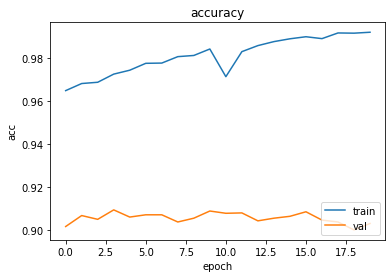

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

<function matplotlib.pyplot.show>

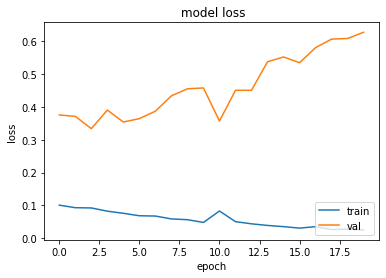

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title(' model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

In [ ]:
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

test auc: 0.8303495507577192


In [ ]:
sequence_input = Input(shape=(SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = Dropout(0.2)(x)
x = LSTM(64)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history3=model.fit(x_train, y_train, validation_split=0.1,
          epochs=20, batch_size=128)

Epoch 1/20
400/400 [==============================] - 146s 360ms/step - loss: 0.1548 - acc: 0.9439 - val_loss: 0.3723 - val_acc: 0.8920
Epoch 2/20
400/400 [==============================] - 145s 362ms/step - loss: 0.0932 - acc: 0.9659 - val_loss: 0.3899 - val_acc: 0.9022
Epoch 3/20
400/400 [==============================] - 142s 355ms/step - loss: 0.0776 - acc: 0.9736 - val_loss: 0.4137 - val_acc: 0.8914
Epoch 4/20
400/400 [==============================] - 143s 358ms/step - loss: 0.0672 - acc: 0.9767 - val_loss: 0.4379 - val_acc: 0.9083
Epoch 5/20
400/400 [==============================] - 143s 358ms/step - loss: 0.0539 - acc: 0.9814 - val_loss: 0.4709 - val_acc: 0.9025
Epoch 6/20
400/400 [==============================] - 144s 360ms/step - loss: 0.0451 - acc: 0.9846 - val_loss: 0.4825 - val_acc: 0.9050
Epoch 7/20
400/400 [==============================] - 142s 356ms/step - loss: 0.0381 - acc: 0.9872 - val_loss: 0.5177 - val_acc: 0.9068
Epoch 8/20
400/400 [============================

<function matplotlib.pyplot.show>

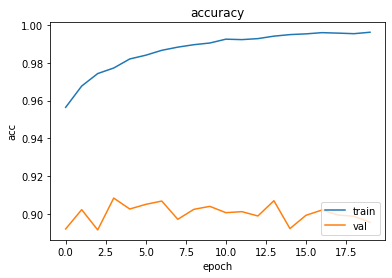

In [ ]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

<function matplotlib.pyplot.show>

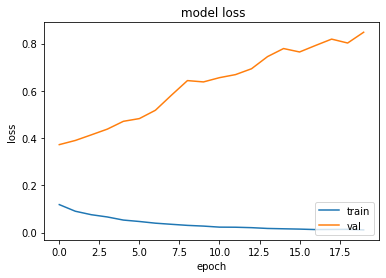

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title(' model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

In [ ]:
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

test auc: 0.8518460321001581


In [ ]:
from keras import backend as K
layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].input])
embedding_output = layer_output([x_test[:3000]])[0]

In [ ]:
emb_shape = embedding_output.shape
to_plot_embedding = embedding_output.reshape(emb_shape[0],emb_shape[1]*emb_shape[2])
y = y_test[:3000]

In [ ]:
emb_tsne = TSNE(perplexity=30).fit_transform(to_plot_embedding)

In [ ]:
print(emb_tsne.shape)
print(y.shape)

(3000, 2)
(3000,)


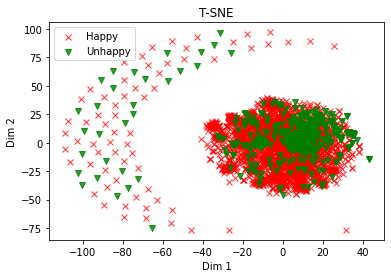

In [ ]:
plt.figure()
plt.scatter(emb_tsne[np.where(y == 0), 0],
                   emb_tsne[np.where(y == 0), 1],
                   marker='x', color='r',
                   linewidth='1', alpha=0.8, label='Happy')
plt.scatter(emb_tsne[np.where(y == 1), 0],
                   emb_tsne[np.where(y == 1), 1],
                   marker='v', color='g',
                   linewidth='1', alpha=0.8, label='Unhappy')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show()  